Neste notebook são realizadas algumas estatísticas básicas como retorno normalizado, média móvel e análise de correlação dos dados. Também verificamos que os retornos diários possuem distribuição normal e que o retorno diário acumulado possui o mesmo resultado que fazer a divisão dos preços pelo seu primeiro valor.

In [ ]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd

## Carregamento dos dados

In [15]:
# os papeis que utilizaremos
stocks = ['AAPL', 'TSLA', 'AMZN', 'GE', 'DB']

In [16]:
# definir início e fim dos dados históricos
start_date = '2015-01-01'
end_date = '2022-01-01'

In [17]:
# download dos dados
close, open, volume = {}, {}, {}

for stock in stocks:
    # utilizaremos o processo de fechamento
    ticker = yf.Ticker(stock)
    close[stock] = ticker.history(start = start_date, end = end_date)['Close']
    open[stock] = ticker.history(start = start_date, end = end_date)['Open']
    volume[stock] = ticker.history(start = start_date, end = end_date)['Volume']
close_data, open_data, volume_data = pd.DataFrame(close), pd.DataFrame(open), pd.DataFrame(volume)

## Análises básicas

<AxesSubplot:title={'center':'Opening Prices'}, xlabel='Date'>

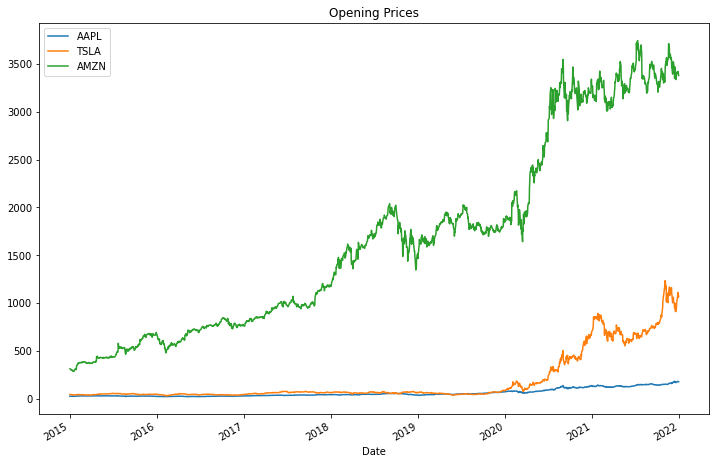

In [6]:
open_data.plot(figsize=(12,8), title = 'Opening Prices')

<AxesSubplot:title={'center':'Volume'}, xlabel='Date'>

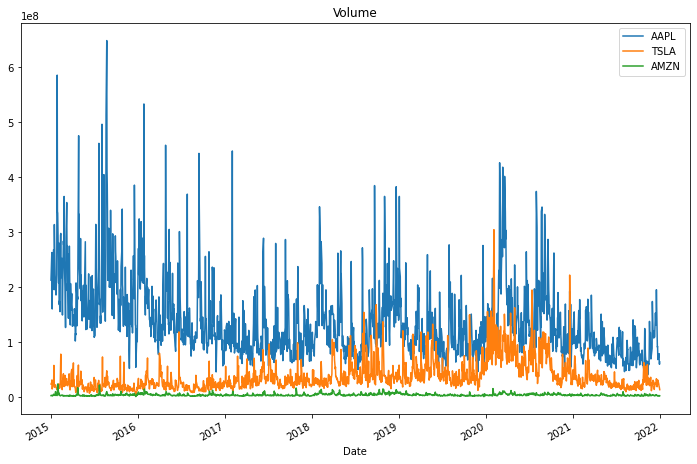

In [9]:
volume_data.plot(figsize=(12,8), title = 'Volume')

In [11]:
total_traded = open_data * volume_data

<AxesSubplot:title={'center':'Total traded'}, xlabel='Date'>

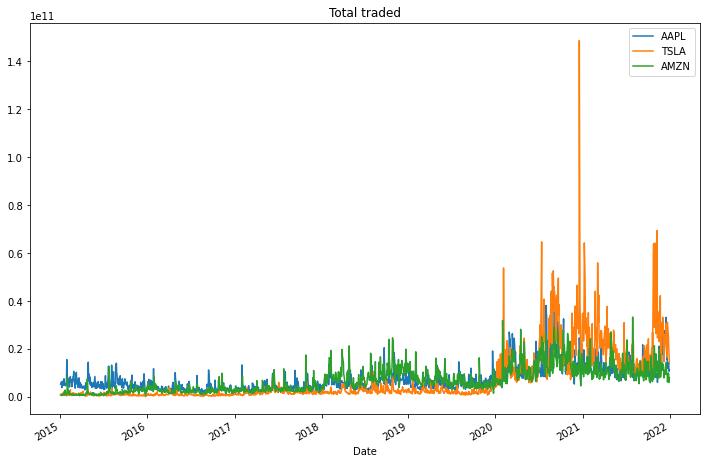

In [12]:
total_traded.plot(figsize=(12,8), title = 'Total traded')

<AxesSubplot:xlabel='Date'>

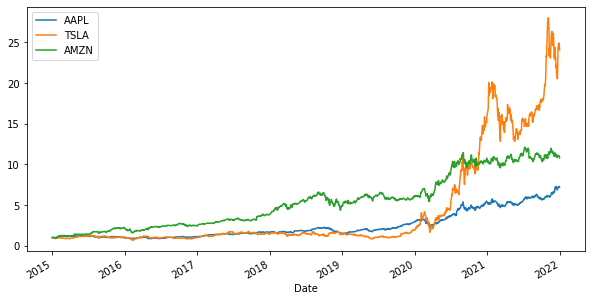

In [13]:
(close_data / close_data.iloc[0]).plot(figsize=(10,5))

## Média móvel

<AxesSubplot:xlabel='Date'>

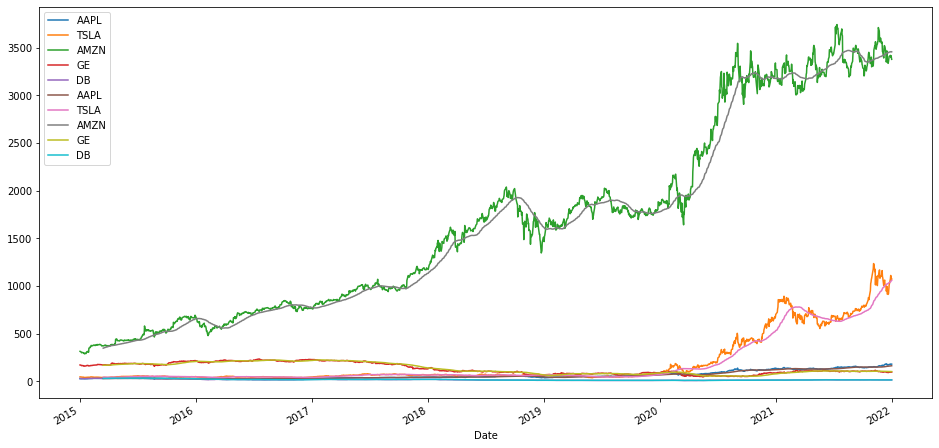

In [22]:
rolling_50 = open_data.rolling(50).mean()
rolling_200 = open_data.rolling(200).mean()
ax = open_data.plot(figsize = (16,8))
rolling_50.plot(ax=ax)

## Matriz de correlação

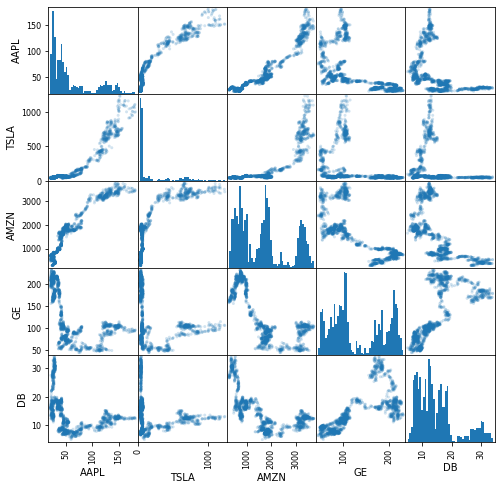

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(open_data, figsize=(8,8), alpha = 0.2, hist_kwds = {'bins': 50});

<AxesSubplot:>

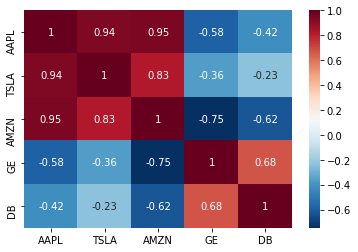

In [26]:
import seaborn as sns
corrmat = open_data.corr()
sns.heatmap(corrmat, annot=True, cmap="RdBu_r")

## Porcentagem diária de mudanças

In [28]:
#returns = (close_data / close_data.shift(1)) - 1
returns = close_data.pct_change()

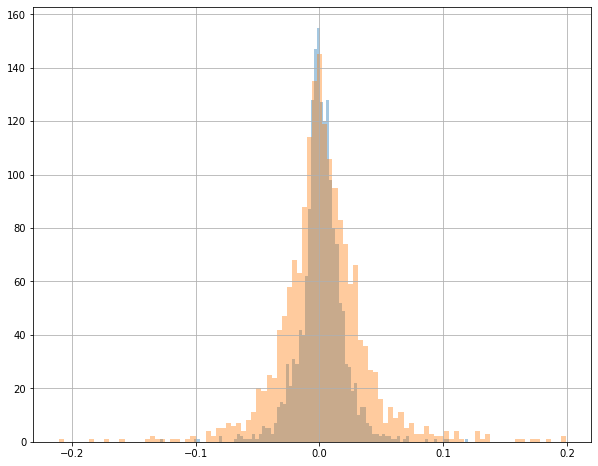

In [38]:
# returns['AAPL'].hist(bins=100, figsize=(10,8), alpha=0.4)
# returns['TSLA'].hist(bins=100, figsize=(10,8), alpha=0.4)
# plt.show()

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'GE'}>],
       [<AxesSubplot:title={'center':'DB'}>, <AxesSubplot:>]],
      dtype=object)

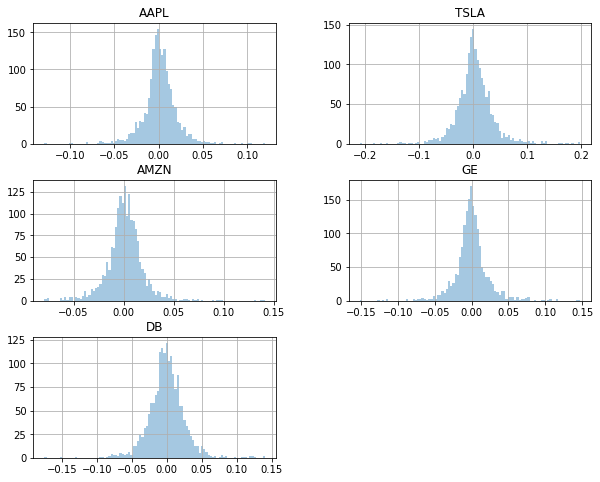

In [43]:
returns.hist(bins=100, figsize=(10,8), alpha=0.4)

<AxesSubplot:>

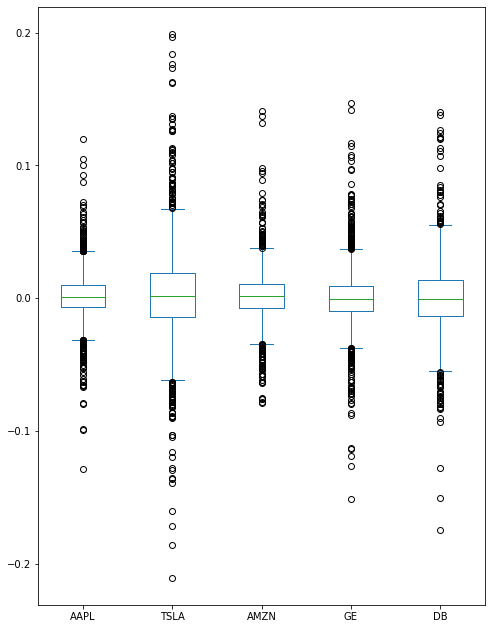

In [39]:
returns.plot(kind='box', figsize=(8,11))

## Comparação de retornos diários entre ações

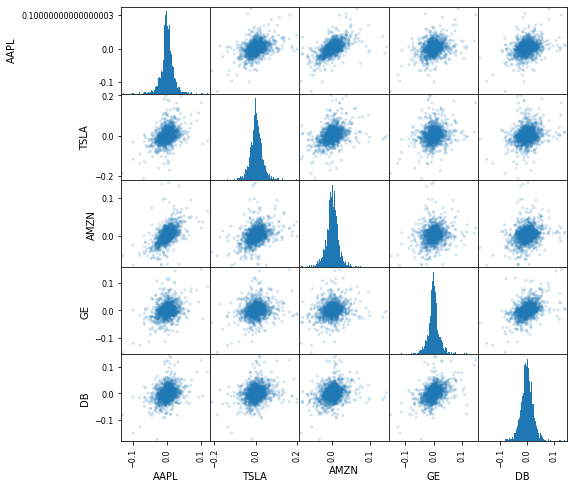

In [40]:
scatter_matrix(returns, figsize=(8,8), alpha=0.2, hist_kwds={'bins':100});

## Devoluções diárias cumulativas

A fórmula para um retorno diário acumulado é:

$ i_i = (1+r_t) * i_{t-1} $

In [41]:
cumulative_return = (1 + returns).cumprod()

<AxesSubplot:title={'center':'Cumulative return'}, xlabel='Date'>

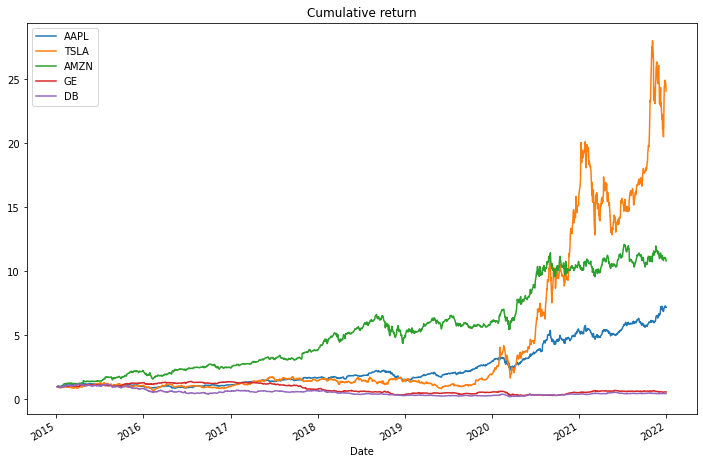

In [42]:
cumulative_return.plot(figsize=(12,8), title = 'Cumulative return')